In [55]:
import os
path = "C:/Users/mghn_/Desktop/Imarticus_Project"
os.chdir(path)
print(os.getcwd())

C:\Users\mghn_\Desktop\Imarticus_Project


In [56]:
print(os.getcwd())

C:\Users\mghn_\Desktop\Imarticus_Project


In [57]:
import pandas as pd
import numpy as np

data=pd.read_csv("TrainData_CSM.csv")

In [58]:
data.head(3)

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,default_ind
0,5000.0,0,10.65,1,21,150119,10.0,2,24000.0,2,...,0.0,0.0,171.62,0.0,1.0,0,0.0,0.0,81008.5,0
1,2500.0,1,15.27,2,33,186161,0.5,2,30000.0,1,...,0.0,0.0,119.66,0.0,1.0,0,0.0,0.0,81008.5,1
2,2400.0,0,15.96,2,34,150119,10.0,2,12252.0,0,...,0.0,0.0,649.91,0.0,1.0,0,0.0,0.0,81008.5,0


In [59]:
data.drop("issue_d",axis=1,inplace=True)

In [60]:
y=data['default_ind']


In [62]:
X=data.drop('default_ind',axis=1)

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

0    441856
1     44303
Name: default_ind, dtype: int64


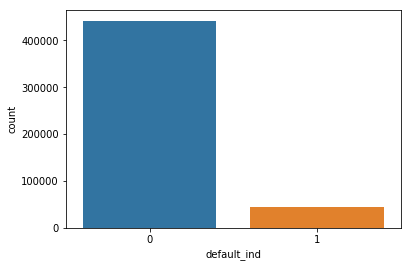

In [64]:
#Visualise the Dataset - target column distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print(data['default_ind'].value_counts())
ax = sns.countplot(x='default_ind',data=data)
#Imbalanced class distribution is seen here

In [66]:
# Oversampling of underrepresented class
# Class to perform over-sampling using SMOTE

from imblearn.over_sampling import SMOTE
doOversampling = True

if doOversampling:
# Apply regular SMOTE - Synthetic Minority Over-sampling Technique
    sm = SMOTE(kind='regular')
    X_train, y_train, = sm.fit_sample(X_train, y_train)
    print('Training Set Shape after oversampling: ', X_train.shape, y_train.shape)
    print(pd.crosstab(y_train,y_train))
else:
    X_train = X_train
    y_train = y_train 

Training Set Shape after oversampling:  (707196, 37) (707196,)
col_0       0       1
row_0                
0      353598       0
1           0  353598


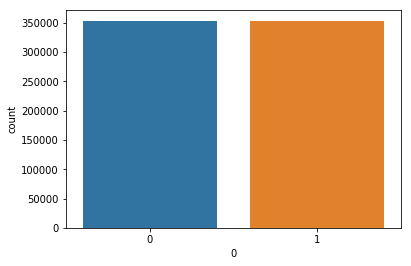

In [67]:
#To check the new distribution
check = pd.DataFrame(y_train)
#check.head(5)
import seaborn as sns
ax = sns.countplot(x=0, data=check)

In [68]:
from sklearn.tree import DecisionTreeClassifier
#First split criterion used in Gini Index

In [69]:
dt_gini=DecisionTreeClassifier(criterion="gini",min_samples_leaf=0.03,max_depth=3,random_state=1) 


In [70]:
gini_predict=dt_gini.fit(X_train,y_train)

In [72]:
y_pred=dt_gini.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("----------Using Gini on training data-----------")
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
acc_score=accuracy_score(y_test,y_pred)
print("The test accuracy is {:.3f}",round(acc_score,5))



----------Using Gini on training data-----------
Classification Report:
              precision    recall  f1-score   support

          0       1.00      0.88      0.94     88258
          1       0.46      0.97      0.62      8974

avg / total       0.95      0.89      0.91     97232

Confusion Matrix 
 [[77883 10375]
 [  241  8733]]
The test accuracy is {:.3f} 0.89082


In [74]:
testData=pd.read_csv("TestData_CSM.csv")

In [75]:
testData.drop('issue_d',axis=1,inplace=True)

In [76]:
y=testData['default_ind']
X=testData.drop('default_ind',axis=1)

In [77]:
y_testData=dt_gini.predict(X)

In [78]:
print("----------Using Gini on Test Data-----------")
print("Classification Report:\n",classification_report(y,y_testData))
print("Confusion Matrix \n",confusion_matrix(y, y_testData))
acc_score=accuracy_score(y,y_testData)
acc_score_test=accuracy_score(y,y_testData)
print("The test accuracy is {:.3f}",round(acc_score_test,5))

----------Using Gini on Test Data-----------
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00    367646
          1       0.58      0.86      0.69      2164

avg / total       1.00      1.00      1.00    369810

Confusion Matrix 
 [[366322   1324]
 [   309   1855]]
The test accuracy is {:.3f} 0.99558


In [79]:
#Now using entropy
dt_entropy=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=0.03,max_depth=3,random_state=1) 


In [80]:
entropy_predict=dt_entropy.fit(X_train,y_train)

In [81]:
y_pred_entropy=dt_entropy.predict(X_test)

In [82]:
print("----------Using Entropy on Training Data-----------")
print("Classification Report:\n",classification_report(y_test,y_pred_entropy))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_entropy))
acc_score_entropy_train=accuracy_score(y_test,y_pred_entropy)
print("The test accuracy is {:.3f}",round(acc_score_entropy_train,5))

----------Using Entropy on Training Data-----------
Classification Report:
              precision    recall  f1-score   support

          0       1.00      0.88      0.94     88258
          1       0.46      0.97      0.62      8974

avg / total       0.95      0.89      0.91     97232

Confusion Matrix 
 [[77848 10410]
 [  241  8733]]
The test accuracy is {:.3f} 0.89046


In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [84]:
y_testData=dt_entropy.predict(X)

In [85]:
print("----------Using Entropy on Test Data-----------")
print("Classification Report:\n",classification_report(y,y_testData))
print("Confusion Matrix \n",confusion_matrix(y, y_testData))
acc_score=accuracy_score(y,y_testData)
print("The test accuracy is {:.3f}",acc_score)


----------Using Entropy on Test Data-----------
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00    367646
          1       0.58      0.86      0.69      2164

avg / total       1.00      1.00      1.00    369810

Confusion Matrix 
 [[366312   1334]
 [   309   1855]]
The test accuracy is {:.3f} 0.9955571780103296


In [86]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score']
models_report = pd.DataFrame(columns = cols)
tmp1 = pd.Series({'Model': " Decision Tree Report",
                 'ROC Score' : roc_auc_score(y,y_testData),
                 'Precision Score': precision_score(y,y_testData),
                 'Recall Score': recall_score(y,y_testData),
                 'Accuracy Score': accuracy_score(y,y_testData)})
model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Decision Tree Report,0.92679,0.581687,0.857209,0.995557


In [ ]:
#Model tuning Begins

In [87]:
print(dt_gini.get_params)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.03, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')>


In [88]:
#Model tuning on Gini index of TrainData.CSV
from sklearn.model_selection import GridSearchCV

In [43]:
params_dt={'max_depth':[3,4,5,6], 'min_samples_leaf':[0.03,0.04,0.05,0.06],'max_features':[0.2,0.4,0.6]}

In [44]:
grid_dt=GridSearchCV(estimator=dt_gini,param_grid=params_dt,scoring='accuracy',cv=10,n_jobs=-1)

In [45]:
gini_cv=grid_dt.fit(X_train,y_train)

In [46]:
best_hyperparam=gini_cv.best_params_
print("Best parameters :",best_hyperparam)

Best parameters : {'max_depth': 5, 'max_features': 0.6, 'min_samples_leaf': 0.03}


In [47]:
best_cv_score=gini_cv.best_score_
print("Best CV score :",best_cv_score)

Best CV score : 0.9453265008600585


In [48]:
best_model=gini_cv.best_estimator_
print("The best estimators ",gini_cv.best_estimator_)

The best estimators  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.03, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


In [49]:
#Trying to compute accuracy on validation set
test_accuracy=best_model.score(X_test,y_test)

In [50]:
print("Best accuracy",test_accuracy)

Best accuracy 0.9447609840381768


In [51]:
#Testing on training data
testData_accuracy=best_model.score(X,y)
print("Performance on unseen data",testData_accuracy)

Performance on unseen data 0.9979232578891863
